Answers to Week 1 bouncingBall
First let's mount the drive and load some libraries.


1. Change the size of the sprite (spriteX,spriteY).
ANSWER: spriteX=25; spriteY=25
2. Use an image of plankton instead of the image of the basketball. You can find images of plankton in the "/content/drive/MyDrive/SCIP_DATA/Images/TEST_IMAGE/" directory.
ANSWER: ball = r'/content/drive/MyDrive/SCIP_DATA/Images/PlanktonClassExamples/voloptus152.jpg' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
start program
colorIM shape (111, 128, 3)


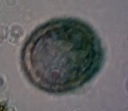

In [3]:
from google.colab import drive
#import matplotlib.pyplot as plt
from IPython import display
import cv2
from google.colab.patches import cv2_imshow
import random
import numpy as np

drive.mount('/content/drive')

# Original value spriteX=50; spriteY=50
# Answer 1. New values
spriteX=25; spriteY=25
##################################### IMAGE STUFF ######################################
print('start program')

#loading image
# Answer 2. New image
ball = r'/content/drive/MyDrive/SCIP_DATA/Images/PlanktonClassExamples/voloptus152.jpg' 
colorIM = cv2.imread(ball) #Read the colored image
print('colorIM shape',colorIM.shape)
spriteIM=cv2.resize(colorIM,(spriteX,spriteY))
cv2_imshow(colorIM)
cv2_imshow(spriteIM)


3. Print the size of displayIM[y0:y0+spriteY,x0:x0+spriteX,:] and the size of spriteIM  using the foo.shape  command (where foo is the array). Notice that they are both the same.

ANSWER: print('displayIM shape',displayIM.shape, 'spriteIM shape',spriteIM.shape)

4. What happens if the they are different, for example by adding 1 to the width, as in displayIM[y0:y0+spriteY+1,x0:x0+spriteX,:] = spriteIM

ANSWER: When source (spriteIM) and destination (displayIM) dimensions do not match, you get the following error message; "could not broadcast input array from shape (25,25,3) into shape (26,25,3"

In [ ]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow

xRez=500; yRez=300; COLOR_CHANNELS=3  # black background dimensions
x0=250; y0=150;   # location of sprite in background

# create black background
displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
# Answer 3
print('displayIM shape',displayIM.shape, 'spriteIM shape',spriteIM.shape)

# insert sprite into background at location spriteX,spriteY
# Answer 4, adding 1 to the width of the insertion location in the displayIM array
displayIM[y0:y0+spriteY+1,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

displayIM shape (300, 500, 3) spriteIM shape (25, 25, 3)


ValueError: ignored

5. Change the code so any image of any size can be inserted. Hint: Before you insert the image, determine the size with foo.shape. 

ANSWER: 
Find the size of the sprite and use the size to allocate the space to insert the spriteIM into the displayIM
(spriteY,spriteX,color)=spriteIM.shape
 
6. Make the background white.

displayIM[:,:]=(255,255,255)
7. Make the background green.

displayIM[:,:]=(0,255,0) # green

8. Make the background blue.

displayIM[:,:]=(255,0,0) # blue



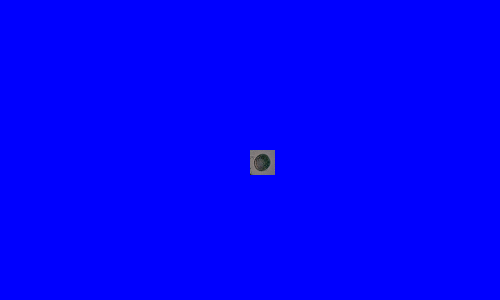

In [ ]:
# create black background
displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
#displayIM[:,:]=(255,255,255) # white
#displayIM[:,:]=(0,255,0) # green
displayIM[:,:]=(255,0,0) # blue


# Answer
# insert sprite into background at location spriteX,spriteY
# Answer 8, find the size of the sprite and use the size to allocate the space to insert the spriteIM into the displayIM
(spriteY,spriteX,color)=spriteIM.shape
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

9. Notice three separate images are display. Make it display that shows all three sprinte images on one black background.
ANSWER: Insert the sprite in the same background image (displayIM)

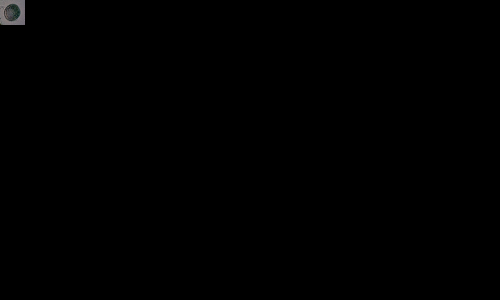

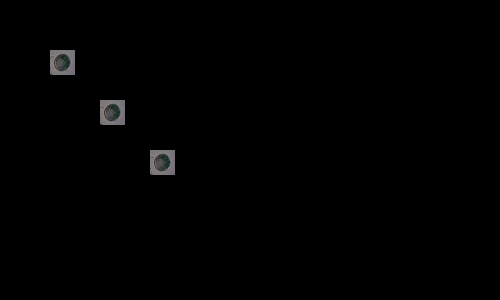

In [ ]:
displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=0; y0=0; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)

displayIM=np.copy(displayBlackIM) # get a copy of the black background
x0=50; y0=50; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display

x0=100; y0=100; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display

x0=150; y0=150; # initial location of ball
displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
cv2_imshow(displayIM)


10. Make the ball increases in size each time is bounced off a wall.

ANSWER: Create a variable called size that increments with each wall hit. When there is a wall hit, increase the sprite dimensions (spriteX,spriteY) and resize the spriteIM.



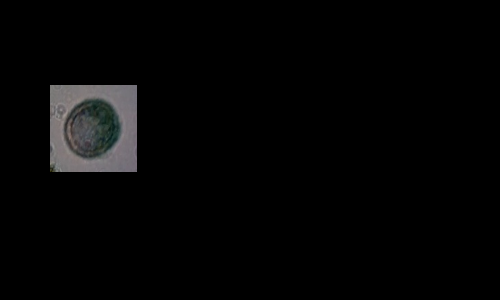

In [ ]:
stepSize=5
moveX=stepSize; moveY=stepSize
CYCLES=200
x0=25; y0=25;  
sizeIncreaseIncrement=0.2 

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

# create size increment variable
size=1

#start with small image
spriteX=10; spriteY=10
spriteIM=cv2.resize(colorIM,(spriteX,spriteY))    

#move image each loop, testing if hitting display boundary
for i in range(CYCLES):          
    # move image
    x0 += moveX
    y0 += moveY
    
    # if wall hit, increase spriteIM size
    if x0 < 0 or y0<0 or x0+spriteX>=xRez or y0+spriteY>=yRez:
      size+=sizeIncreaseIncrement # increase size, can be float so it doesn't increase too much with each wall hit
      spriteX*=size; spriteY*=size
      spriteX=int(spriteX); spriteY=int(spriteY)  # index to numpy array must be int, not float! 
      spriteIM=cv2.resize(colorIM,(spriteX,spriteY))    
 
    # check again if wall hit, this time with updated size
    if x0 < 0:
        moveX = stepSize # make the increment positive
        x0=0
    if y0<0:
        moveY = stepSize  # make the increment positive
        y0=0
    if x0+spriteX>=xRez:
        moveX = -stepSize  # make the increment negative
        x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
        moveY = -stepSize  # make the increment negative
        y0=yRez-spriteY-1
        
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)
    

11. Make the ball increases in size each with each cycle of the animation.

ANSWER: Very similar to #10, except increase it every step. Make the increment really small, and reduce the number of steps (CYCLES) so the spriteIM does not get too big.


cycle 119 size= 1.12


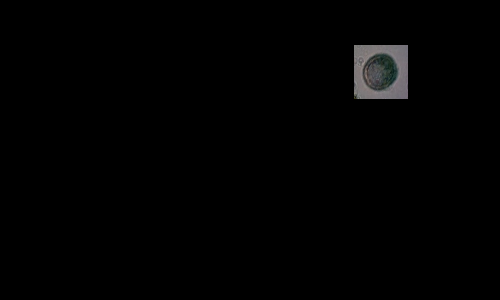

In [ ]:
stepSize=5
moveX=stepSize; moveY=stepSize
CYCLES=120 # had to limit cycles becase sprite grows really large
x0=25; y0=25;  
sizeIncreaseIncrement=0.001 

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

# create size increment variable
size=1

#start with small image
spriteX=10; spriteY=10
spriteIM=cv2.resize(colorIM,(spriteX,spriteY))    

#move image each loop, testing if hitting display boundary
for i in range(CYCLES):          
    # move image
    x0 += moveX
    y0 += moveY
    
    # increase spriteIM size every movement step (loop cycle)
    size+=sizeIncreaseIncrement # increase size, can be float so it doesn't increase too much with each wall hit
    print('cycle', i,'size=',round(size,3)) # display size
    spriteX*=size; spriteY*=size
    spriteX=int(spriteX); spriteY=int(spriteY)  # index to numpy array must be int, not float! 
    spriteIM=cv2.resize(colorIM,(spriteX,spriteY)) 
    
    # check again if wall hit, this time with updated size
    if x0 < 0:
        moveX = stepSize # make the increment positive
        x0=0
    if y0<0:
        moveY = stepSize  # make the increment positive
        y0=0
    if x0+spriteX>=xRez:
        moveX = -stepSize  # make the increment negative
        x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
        moveY = -stepSize  # make the increment negative
        y0=yRez-spriteY-1
        
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)

12. Make the animation end after the sprite hits the walls 4 times.

In [ ]:

x0=200; y0=100; # starting position  
moveX=minRange; moveY=minRange # initial increment values
CYCLES=200

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
hitCount=0    
#move image each loop, until spriteIM hits the wall the fourth time
while (hitCount<4):
    # move image
    x0 += moveX
    y0 += moveY

    # check if spriteIM hits a wall
    if x0 < 0:
      hitCount+=1
      moveX = stepSize # make the increment positive
      x0=0
    if y0<0:
      hitCount+=1
      moveY = stepSize  # make the increment positive
      y0=0
    if x0+spriteX>=xRez:
      hitCount+=1
      moveX = -stepSize  # make the increment negative
      x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
      hitCount+=1
      moveY = -stepSize  # make the increment negative
      y0=yRez-spriteY-1
    
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)
    print('hitCount',hitCount)

hitCount 4


13. Make the background flash red for one cycle when the sprite touches a wall.
ANSWER:
Create a hitFlag that is set each time the sprite hits a boundary. When hit detected, set background to red. On the next cycle, return the background back to black.


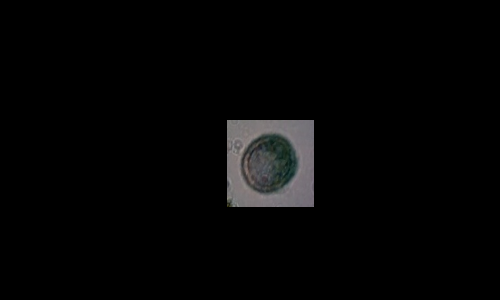

In [ ]:
stepSize=5
x0=100; y0=50;  
moveX=stepSize; moveY=stepSize
CYCLES=100

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    
hitFlag=0 # set to 1 when sprite touches display boundary
#move image each loop, testing if hitting display boundary
for i in range(CYCLES):        

    # if hitFlag left over from last loop, turn background back to black
    if hitFlag==1:
      displayBlackIM[:,:]=0 # return display background to black
      hitFlag=0             # reset hitFlag

    # move image
    x0 += moveX
    y0 += moveY
    
    # change random directions if hit display boundary
    if x0 < 0:
      hitFlag=1
      moveX = stepSize # make the increment positive
      x0=0
    if y0<0:
      hitFlag=1
      moveY = stepSize  # make the increment positive
      y0=0
    if x0+spriteX>=xRez:
      hitFlag=1
      moveX = -stepSize  # make the increment negative
      x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
      hitFlag=1
      moveY = -stepSize  # make the increment negative
      y0=yRez-spriteY-1
    
    if hitFlag==1:
      displayBlackIM[:,:]=(0,0,255) # set background to red on hit
 
    # move image
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)

14. Everytime the sprite hits a wall, change the background to a random color.
ANSWER. Similar to 13, excect upon hit, change color to random value, and don't reset it the next loop cycle.

color r= 12 g= 21 b= 198


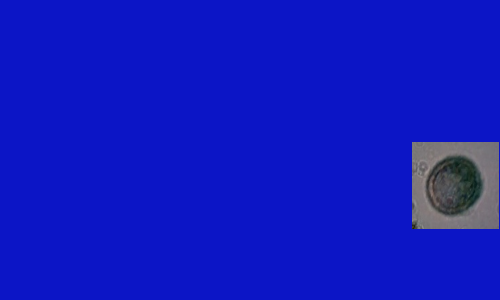

In [ ]:
stepSize=10
x0=100; y0=50;  
moveX=stepSize; moveY=stepSize
CYCLES=200

displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    
hitFlag=0 # set to 1 when sprite touches display boundary
#move image each loop, testing if hitting display boundary
for i in range(CYCLES):          
    # move image
    x0 += moveX
    y0 += moveY
    
    # change random directions if hit display boundary
    if x0 < 0:
      hitFlag=1
      moveX = stepSize # make the increment positive
      x0=0
    if y0<0:
      hitFlag=1
      moveY = stepSize  # make the increment positive
      y0=0
    if x0+spriteX>=xRez:
      hitFlag=1
      moveX = -stepSize  # make the increment negative
      x0=xRez-spriteX-1
    if y0+spriteY>=yRez:
      hitFlag=1
      moveY = -stepSize  # make the increment negative
      y0=yRez-spriteY-1
    
    if hitFlag==1:
      r=random.randint(0,255)
      g=random.randint(0,255)
      b=random.randint(0,255)
      hitFlag=0
      
      displayBlackIM[:,:]=(b,g,r) # set background to red on hit
    # move image
    print('color r=',r,'g=',g,'b=',b)
    displayIM=np.copy(displayBlackIM)
    displayIM[y0:y0+spriteY,x0:x0+spriteX,:] = spriteIM  # paste sprite image into black display
    cv2_imshow(displayIM)
    sleep(0.1) # delay so we can see the image
    display.clear_output(wait=True)